In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
%matplotlib inline

In [6]:
df=pd.read_csv("D:/train.csv")

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
"""Now i have to find skewness for Non-Numerical data  e.g:(Credit_history,Property_area etc)"""

df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

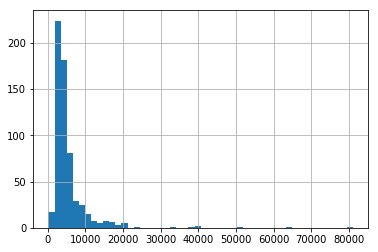

In [11]:
"""Now i have to study Distribution of Numerical Variables"""
df['ApplicantIncome'].hist(bins=50)

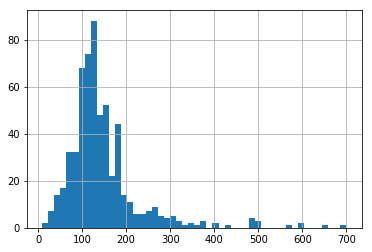

In [12]:
df['LoanAmount'].hist(bins=50)


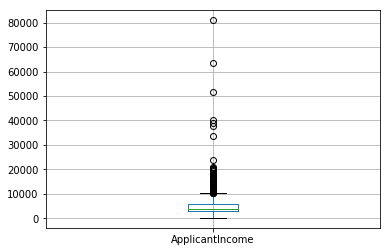

In [13]:
df.boxplot(column='ApplicantIncome')

In [11]:
"""Box Plot shows that here is some outliers in the data """

'Box Plot shows that here is some outliers in the data '

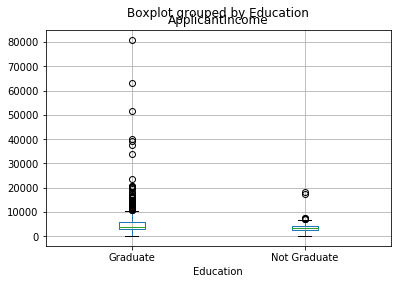

In [14]:
df.boxplot(column='ApplicantIncome',by='Education')

In [13]:
"""Now we can see that there is just a little difference between graduate and Non_graduate Income
    But there are high number of Graduates with very high Income,which might be outliers       """

'Now we can see that there is just a little difference between graduate and Non_graduate Income\n    But there are high number of Graduates with very high Income,which might be outliers       '

In [15]:
temp1=df['Credit_History'].value_counts(ascending=False)

In [15]:
"""Now i will change 'Y' and  'N ' to 1 And 0 through Pivot table """

"Now i will change 'Y' and  'N ' to 1 And 0 through Pivot table "

In [16]:
temp2=df.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

In [17]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [18]:
"""Now we observe that we get a similar Pivot table Like Ms excel."""
"""Now i will plot this data through bar chart using matplotlib.pyplot"""

'Now i will plot this data through bar chart using matplotlib.pyplot'

In [18]:
fig=plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

Text(0.5,1,'Applicants by Credit History')

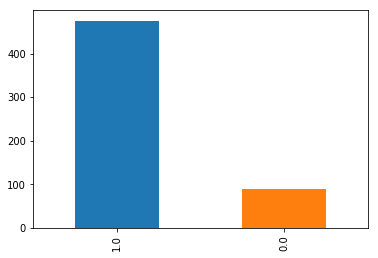

In [19]:
ax1=fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Apllicant')
ax1.set_title('Applicants by Credit History')


Text(0.5,1,'Probability of getting loan by credit history')

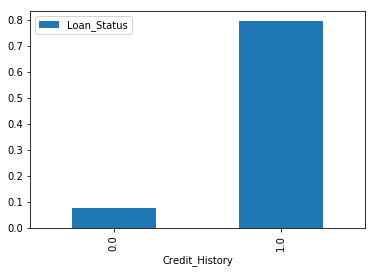

In [20]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [23]:
"""This shows that probability of getting a loan are eight-fold if the applicant has a valid credit History"""

'This shows that probability of getting a loan are eight-fold if the applicant has a valid credit History'

In [21]:
temp3=df['Married'].value_counts(ascending=False)

In [22]:
temp3

Yes    398
No     213
Name: Married, dtype: int64

C:\Users\Nomi khan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Married Applicants')

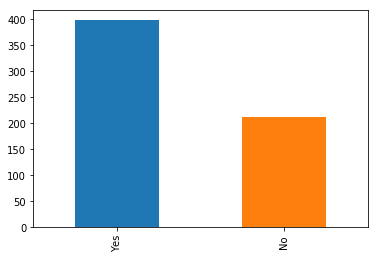

In [23]:
ax3=fig.add_subplot(122)
temp3.plot(kind='bar')
ax3.set_xlabel('Married')
ax3.set_ylabel('Count Of Applicant')
ax3.set_title('Married Applicants')

In [28]:
"""Alternatively we can show these plots by combining them in a stacked"""

'Alternatively we can show these plots by combining them in a stacked'

In [24]:
temp4=pd.crosstab(df['Credit_History'],df['Loan_Status'])

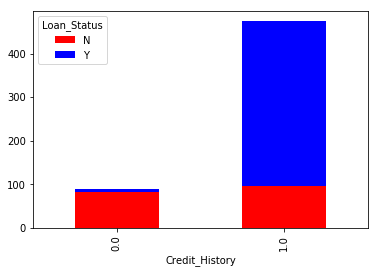

In [25]:
temp4.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [26]:
temp5=pd.crosstab(df['Credit_History'],df['Married'])


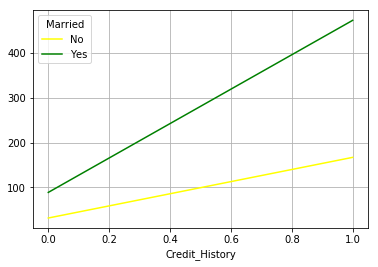

In [27]:
temp5.plot(kind='line',stacked=True,color=['Yellow','green'],grid=True)

In [33]:
"""Now i have to check null values in the dataset"""


'Now i have to check null values in the dataset'

In [28]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [31]:
"""Now removing null values from fields"""
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(),inplace=True)

In [32]:
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(),inplace=True)

In [46]:
"""Now, we will create a Pivot table, which provides us median values for all the groups of unique values 
of Self_Employed and Education features. Next, we define a function, 
which returns the values of these cells and apply it to fill the missing values of loan amount:"""

'Now, we will create a Pivot table, which provides us median values for all the groups of unique values \nof Self_Employed and Education features. Next, we define a function, \nwhich returns the values of these cells and apply it to fill the missing values of loan amount:'

In [33]:
df['Self_Employed'].fillna('No',inplace=True)

In [35]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [36]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [37]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [39]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [40]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [41]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
"""Now all missing values has been replaced ,Now it's time to detect outliers and remove them"""

"Now all missing values has been replaced ,Now it's time to detect outliers and remove them"

In [64]:
"""Let’s analyze LoanAmount first. Since the extreme values are practically possible, 
i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, 
let’s try a log transformation to nullify their effect:"""

'Let’s analyze LoanAmount first. Since the extreme values are practically possible, \ni.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, \nlet’s try a log transformation to nullify their effect:'

In [42]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

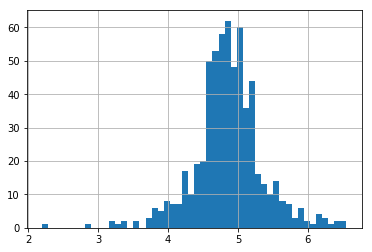

In [43]:
df['LoanAmount_log'].hist(bins=50)

In [67]:
"""Now it's look like Normal distributed"""
"""Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support
Co-applicants. So it might be a good idea to combine both incomes as total income and take a 
log transformation of the same."""

'Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support\nCo-applicants. So it might be a good idea to combine both incomes as total income and take a \nlog transformation of the same.'

In [44]:
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

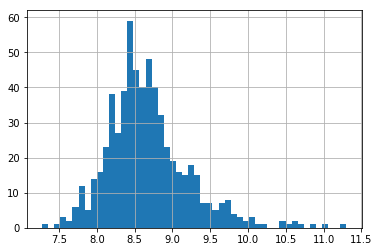

In [45]:
df['Total_income_log']=np.log(df['Total_income'])
df['Total_income_log'].hist(bins=50)

In [46]:
df['LoanApproval']=df['LoanAmount']/df['Total_income']

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log,LoanApproval
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,0.025032
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0.023500


In [76]:
"""Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into 
numeric by encoding the categories. """

'Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into \nnumeric by encoding the categories. '

In [48]:
from sklearn.preprocessing import LabelEncoder

    

In [73]:
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
Total_income         float64
Total_income_log     float64
LoanApproval         float64
dtype: object

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics


C:\Users\Nomi khan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Nomi khan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
"""Generic function for making a classification """
        
        
    
    

'Generic function for making a classification '

In [74]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [75]:
outcome_var='Loan_Status'
model=LogisticRegression()
predictor_var=['Credit_History']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [76]:
predictors_var=['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,df,predictors_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [77]:
"""Now Decision Tree is another Algorithm Which is better than LogisticRegression"""
model=DecisionTreeClassifier()
predictors_var1=['Credit_History','Gender','Education','Self_Employed']
classification_model(model,df,predictors_var1,outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 79.968%


In [78]:
"""With more Feature Accuracy is increasing but but a slight decrease in Cross-Validation"""
"""Now try Random Forest which another algorithm for Classification"""
model = RandomForestClassifier(n_estimators=100)
predictor_var2 = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','Total_income_log']
classification_model(model, df,predictor_var2,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.039%


In [79]:
"""Here we see that the accuracy is 100% for the training set.
This is the ultimate case of overfitting and can be resolved in two ways:

Reducing the number of predictors
Tuning the model parameters  """

'Here we see that the accuracy is 100% for the training set.\nThis is the ultimate case of overfitting and can be resolved in two ways:\n\nReducing the number of predictors\nTuning the model parameters  '

In [81]:
featimpo=pd.Series(model.feature_importances_,index=predictor_var2).sort_values(ascending=False)
print(featimpo)

Credit_History      0.277887
Total_income_log    0.259810
LoanAmount_log      0.229653
Dependents          0.050879
Property_Area       0.050281
Loan_Amount_Term    0.041947
Gender              0.023313
Married             0.023260
Education           0.022357
Self_Employed       0.020613
dtype: float64


In [86]:
"""Lets use a top five variable to build A model"""
model=RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1)
predictor_var=['Credit_History','Total_income_log','LoanAmount_log','Dependents','Property_Area']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 82.736%
Cross-Validation Score : 81.112%


In [84]:
"""Notice that although accuracy reduced, but the cross-validation score is improving showing that
the model is generalizing well"""

'Notice that although accuracy reduced, but the cross-validation score is improving showing that\nthe model is generalizing well'

In [ ]:
"""At the end it is concluded that those applicant will get loan who has Credit History,PropertY and Dependents on someone.Also having Some Income"""